In [1]:
%pylab inline
import os.path as op
import sys
import os
import json
import skimage.color
import skimage.filters
import morphsnakes as ms
import io3d.datasets
import scipy.ndimage

pth = op.abspath("..")
sys.path.insert(0, pth)
import scaffan
import scaffan.annotation as scan
import scaffan.image as scim
import scaffan.texture as satex
import scaffan.texture_lbp as salbp
scaffan.image.import_openslide()
import openslide

Populating the interactive namespace from numpy and matplotlib


In [2]:
# pth = r"e:data/scaffold/Hamamatsu/PIG-008_P008 LL-P_HE_parenchyme perif..ndpi"
fn = io3d.datasets.join_path("medical", "orig", "CMU-1.ndpi", get_root=True)
anim = scim.AnnotatedImage(fn)


tile_size = 100

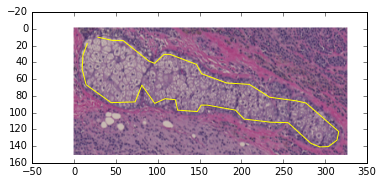

In [3]:

view1 = anim.get_view_on_annotations("obj1", level=3)

region = view1.get_region_image()
imshow(region)
view1.plot_annotations("obj1")

In [4]:
view1.annotations


[{'title': 'obj2',
  'color': '#00ff00',
  'x': [6999716, 6910283, 7110680, 7865900, 8097766, 7625754, 7612504],
  'y': [-6831934, -6432321, -5968314, -6291963, -6990456, -7094486, -6911196],
  'x_nm': array([6999716, 6910283, 7110680, 7865900, 8097766, 7625754, 7612504]),
  'y_nm': array([-6831934, -6432321, -5968314, -6291963, -6990456, -7094486, -6911196]),
  'x_mm': array([ 6.999716,  6.910283,  7.11068 ,  7.8659  ,  8.097766,  7.625754,
          7.612504]),
  'y_mm': array([-6.831934, -6.432321, -5.968314, -6.291963, -6.990456, -7.094486,
         -6.911196]),
  'x_px': array([ 30251.600359,  30055.652656,  30494.722483,  32149.409503,
          32657.427909,  31623.249617,  31594.218867]),
  'y_px': array([  9200.975035 ,  10079.1246025,  11098.779985 ,  10387.5613075,
           8852.62294  ,   8624.017015 ,   9026.79679  ]),
  'region_x_px': array([ 3014.54144756,  2990.04798469,  3044.93171306,  3251.76759056,
          3315.26989131,  3185.99760481,  3182.36876106]),
  'regi

In [5]:
anim.annotations

[{'title': 'obj2',
  'color': '#00ff00',
  'x': [6999716, 6910283, 7110680, 7865900, 8097766, 7625754, 7612504],
  'y': [-6831934, -6432321, -5968314, -6291963, -6990456, -7094486, -6911196],
  'x_nm': array([6999716, 6910283, 7110680, 7865900, 8097766, 7625754, 7612504]),
  'y_nm': array([-6831934, -6432321, -5968314, -6291963, -6990456, -7094486, -6911196]),
  'x_mm': array([ 6.999716,  6.910283,  7.11068 ,  7.8659  ,  8.097766,  7.625754,
          7.612504]),
  'y_mm': array([-6.831934, -6.432321, -5.968314, -6.291963, -6.990456, -7.094486,
         -6.911196]),
  'x_px': array([ 30251.600359,  30055.652656,  30494.722483,  32149.409503,
          32657.427909,  31623.249617,  31594.218867]),
  'y_px': array([  9200.975035 ,  10079.1246025,  11098.779985 ,  10387.5613075,
           8852.62294  ,   8624.017015 ,   9026.79679  ])},
 {'title': '',
  'color': '#0000ff',
  'x': [7401627, 7421980, 7551725, 7528826],
  'y': [-6536437, -6455282, -6506002, -6615075],
  'x_nm': array([74016

In [7]:
view1.get_annotation_region_raster("obj1")

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

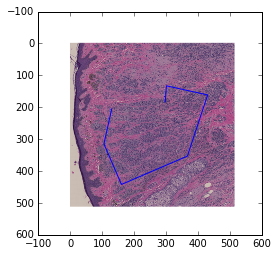

In [11]:
view2 = anim.get_view(center=[x, y], level=3, size=[512, 512])
region = view2.get_region_image()
imshow(region)
annotation = view2.annotations[0]
x = np.mean(annotation["x_px"])
y = np.mean(annotation["y_px"])
plot(annotation["region_x_px"], annotation["region_y_px"])

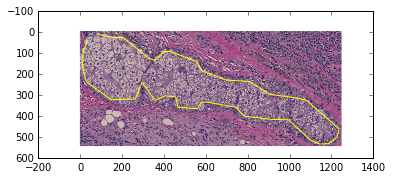

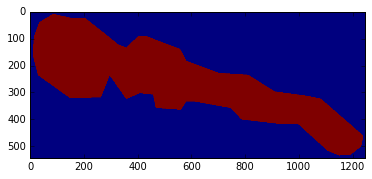

In [12]:
view1 = anim.get_view_on_annotations("obj1", level=1)
region = view1.get_region_image()
imshow(region)
view1.plot_annotations("obj1")
plt.figure()
mask = view1.get_annotation_region_raster("obj1")
region = view1.get_region_image()
imshow(mask)

C:\Users\miros\Miniconda3\envs\lisa36\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\miros\Miniconda3\envs\lisa36\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


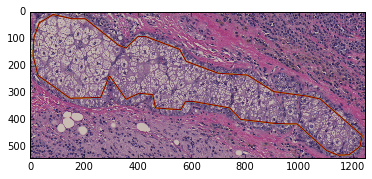

In [13]:
plt.imshow(region)
plt.contour(mask)

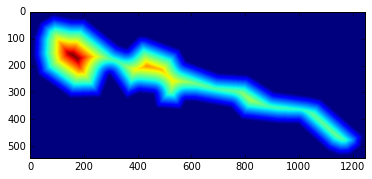

In [14]:
dst = scipy.ndimage.morphology.distance_transform_edt(mask)
plt.imshow(dst)

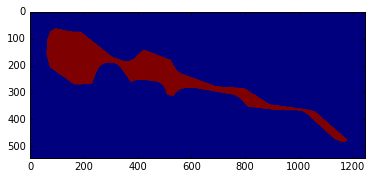

In [15]:
middle_pixels = dst > (tile_size/2)
plt.imshow(middle_pixels)

In [16]:
def nonzero_with_step(data, step):
    print(data.shape)
    datastep = data[::step, ::step]
    print(datastep.shape)
    nzx, nzy = np.nonzero(datastep)
    
    return nzx* step, nzy * step

In [17]:
nz = nonzero_with_step(middle_pixels, 50 )

(544, 1246)
(11, 25)


In [ ]:
nz

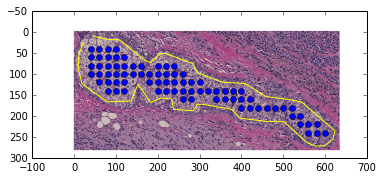

In [18]:
view1 = anim.get_view_on_annotations("obj1", level=2, show=True)
nz = satex.select_texture_patch_centers_from_one_annotation(anim, "obj1", tile_size=32, step=20)

plt.plot(nz[1], nz[0], "bo")
# nz

In [ ]:
imshow(region)
scan.plot_annotations(anim.annotations, in_region=True)

In [ ]:
annotation

# Get Features

In [ ]:
def show_lbp(lbp):
    n_bins = int(lbp.max() + 1)
    plt.hist(lbp.ravel(), range=(0, n_bins), bins=n_bins, normed=True)
    plt.xlim(xmax=n_points + 2)


In [ ]:
anim.region_location

In [ ]:
def coords_region_px_to_global_px(anim, points):
    px_factor = anim.openslide.level_downsamples[anim.region_level]
    print(px_factor)
    x_px = anim.region_location[0] + points[0] * px_factor
    y_px = anim.region_location[1] + points[1] * px_factor
    
    return x_px, y_px

In [ ]:

nz_base_px = coords_region_px_to_global_px(anim, nz)
points = list(zip(nz_base_px[0], nz_base_px[1]))
print(len(points))

In [ ]:
from skimage.feature import local_binary_pattern


i = 12
anim.set_region(center=points[i], level=0, size=[128, 128])
# anim.set_region(center=anim.region_location, level=4, size=[320, 320])
region_gray = anim.get_region_image(as_gray=True)

# settings for LBP
radius = 3
n_points = 8 * radius
METHOD="uniform"
lbp = local_binary_pattern(region_gray, n_points, radius, METHOD)
lbp.shape
figure()
imshow(region_gray, cmap="gray")
figure()
show_lbp(lbp)

In [ ]:
from skimage.feature import local_binary_pattern

points = list(zip(nz[0], nz[1]))
i = 2

# anim.set_region(center=points[i], level=4, size=[320, 320])
anim.set_region(center=anim.region_location, level=4, size=[320, 320])
region_gray = anim.get_region_image(as_gray=True)

# settings for LBP
radius = 3
n_points = 8 * radius
METHOD="uniform"
lbp = local_binary_pattern(region_gray, n_points, radius, METHOD)
lbp.shape
figure()
imshow(region_gray, cmap="gray")
figure()
show_lbp(lbp)

# Get features from non rectangular area

In [ ]:
anim.set_region_on_annotations("obj1", level=2, show=True)
region_gray = anim.get_region_image(as_gray=True)
mask = anim.get_annotation_region_raster(i="obj1")
plt.figure()
plt.imshow(region_gray)
plt.figure()
plt.imshow(mask)


lbp = local_binary_pattern(region_gray, n_points, radius, METHOD)
len(lbp[mask])

plt.figure()
show_lbp(lbp[mask].ravel())


                                         
                                         